In [1]:
import sagemaker
import boto3
import time

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import io

import numpy as np

profile = 'sites'
region_name='us-east-2'
bucket = 'st-crayon-dev'
prefix = 'sagemaker/labelbox/'
endpoint_name = 'ss-labelbox-1024-size-1024-v0'

session = boto3.session.Session(profile_name = profile, region_name = region_name)
runtime_client = session.client('runtime.sagemaker')

(1024, 1024)


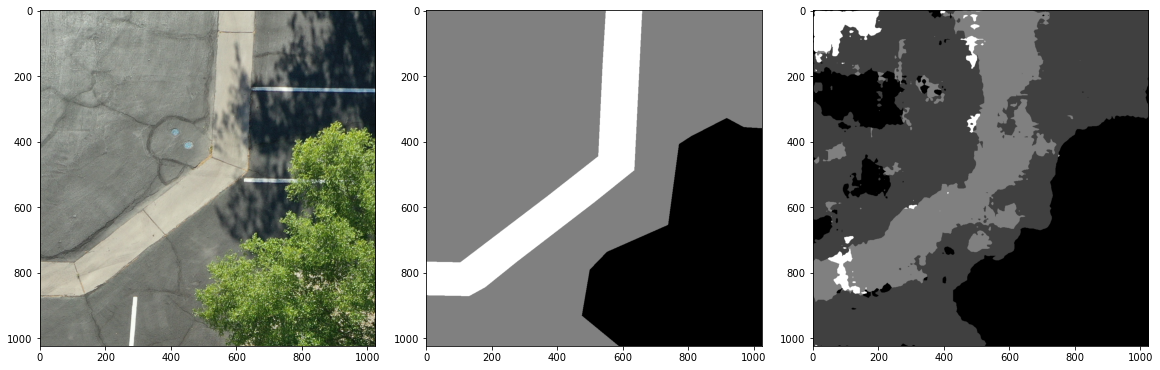

In [6]:

img_orig = '../../../../data/20_AZ_1066_DBM3174640504_-_Mapping_-_DBI0278920773_DBI-21-gnNDUPti-DJI_0374-000006.jpg'
mask_orig = '../../../../data/20_AZ_1066_DBM3174640504_-_Mapping_-_DBI0278920773_DBI-21-gnNDUPti-DJI_0374-000006.png'
# endpoints = sagemaker_client.list_endpoints()

im = PIL.Image.open(img_orig)
# im.thumbnail([800,600],PIL.Image.ANTIALIAS)
# im.save(img_orig, "JPEG")
print(im.size)
# converting images to bytearray
with open(img_orig, 'rb') as image:
    img_4_pred = image.read()
    img_4_pred = bytearray(img_4_pred)

# envoking the endpoint
response = runtime_client.invoke_endpoint(EndpointName = endpoint_name,
                                         ContentType = 'image/jpeg',
                                         Accept = 'image/png',
                                         Body = img_4_pred)
prediction = response['Body'].read()           
img_orig = PIL.Image.open(img_orig)
mask_orig = PIL.Image.open(mask_orig)
    
mask_pred = np.array(Image.open(io.BytesIO(prediction)))
fig, axs = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)
mask = np.array(Image.open(io.BytesIO(prediction)))
axs[0].imshow(img_orig,cmap='gray')
axs[1].imshow(mask_orig,cmap='gray')
axs[2].imshow(mask_pred, cmap='gray')

(1024, 1024)


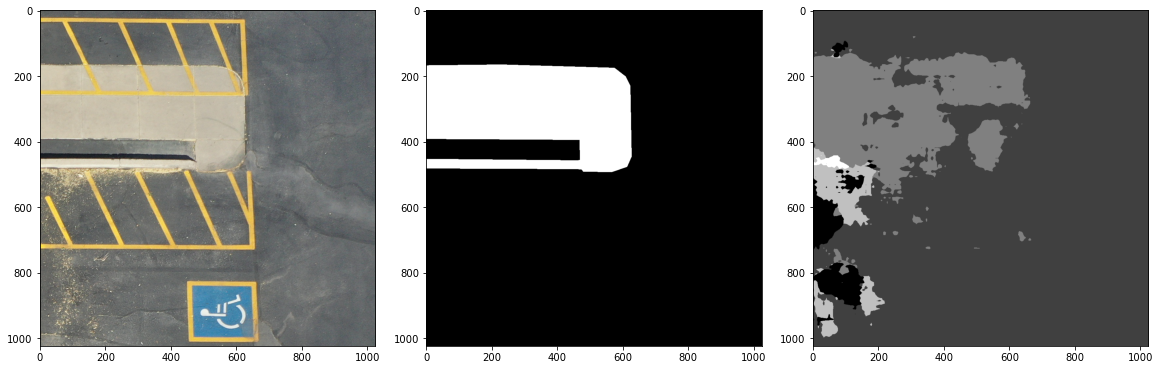

In [7]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import io
img_orig = '../../../../data/20_AZ_1066_DBM3174640504_-_Mapping_-_DBI1241193905_DBI-182-OdXNjnWs-DJI_0535-000009.jpg'
mask_orig = '../../../../data/20_AZ_1066_DBM3174640504_-_Mapping_-_DBI1241193905_DBI-182-OdXNjnWs-DJI_0535-000009.png'
# endpoints = sagemaker_client.list_endpoints()

im = PIL.Image.open(img_orig)
# im.thumbnail([800,600],PIL.Image.ANTIALIAS)
# im.save(img_orig, "JPEG")
print(im.size)
# converting images to bytearray
with open(img_orig, 'rb') as image:
    img_4_pred = image.read()
    img_4_pred = bytearray(img_4_pred)

# envoking the endpoint
response = runtime_client.invoke_endpoint(EndpointName = endpoint_name,
                                         ContentType = 'image/jpeg',
                                         Accept = 'image/png',
                                         Body = img_4_pred)
prediction = response['Body'].read()           
img_orig = PIL.Image.open(img_orig)
mask_orig = PIL.Image.open(mask_orig)
    
mask_pred = np.array(Image.open(io.BytesIO(prediction)))
fig, axs = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)
mask = np.array(Image.open(io.BytesIO(prediction)))
axs[0].imshow(img_orig,cmap='gray')
axs[1].imshow(mask_orig,cmap='gray')
axs[2].imshow(mask_pred, cmap='gray')

In [17]:
import botocore

BUCKET_NAME = bucket # replace with your bucket name
KEY = 'data/raw/imgs/tiles_1024/annotations/20_TX_362_DBM9850599032_-_Mapping_-_DBI4179707281_DBI-367-7sUDRjPc-DJI_0881-000005.png' # replace with your object key
save_to = '../../../../data/20_TX_362_DBM9850599032_-_Mapping_-_DBI4179707281_DBI-367-7sUDRjPc-DJI_0881-000005.png'

s3 = session.resource('s3')

try:
    s3.Bucket(BUCKET_NAME).download_file(KEY, f'{save_to}')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise



(1024, 1024)


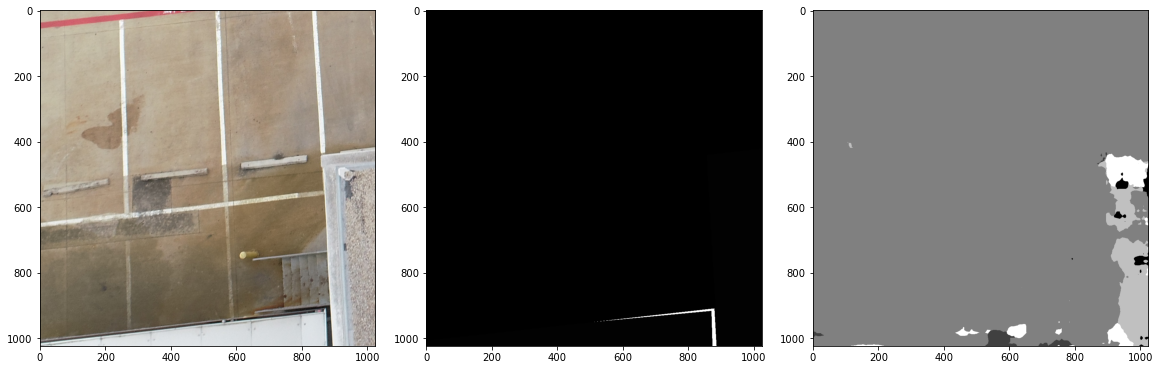

In [18]:
img_orig = '../../../../data/20_TX_362_DBM9850599032_-_Mapping_-_DBI4179707281_DBI-367-7sUDRjPc-DJI_0881-000005.jpg'
mask_orig = '../../../../data/20_TX_362_DBM9850599032_-_Mapping_-_DBI4179707281_DBI-367-7sUDRjPc-DJI_0881-000005.png'
# endpoints = sagemaker_client.list_endpoints()

im = PIL.Image.open(img_orig)
# im.thumbnail([800,600],PIL.Image.ANTIALIAS)
# im.save(img_orig, "JPEG")
print(im.size)
# converting images to bytearray
with open(img_orig, 'rb') as image:
    img_4_pred = image.read()
    img_4_pred = bytearray(img_4_pred)

# envoking the endpoint
response = runtime_client.invoke_endpoint(EndpointName = endpoint_name,
                                         ContentType = 'image/jpeg',
                                         Accept = 'image/png',
                                         Body = img_4_pred)
prediction = response['Body'].read()           
img_orig = PIL.Image.open(img_orig)
mask_orig = PIL.Image.open(mask_orig)
    
mask_pred = np.array(Image.open(io.BytesIO(prediction)))
fig, axs = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)
mask = np.array(Image.open(io.BytesIO(prediction)))
axs[0].imshow(img_orig,cmap='gray')
axs[1].imshow(mask_orig,cmap='gray')
axs[2].imshow(mask_pred, cmap='gray')